In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(rc={"figure.figsize":(15,0)})
pd.set_option("display.max_column", None)

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(24)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [13]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [14]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [15]:
data['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [16]:
for i in categorical_features:
    print(i, data[i].unique())
    print()
    print("*************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

*************************

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

*************************

race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

****

In [17]:
workclass_mode = data["workclass"].mode()[0]
workclass_mode

'Private'

In [18]:
occupation_mode = data["occupation"].mode()[0]
occupation_mode

'Prof-specialty'

In [19]:
native_country_mode = data["native.country"].mode()[0]
native_country_mode

'United-States'

In [20]:
# remove ? and replace with mode value(.mode())
data["workclass"] = data["workclass"].replace("?",workclass_mode)
data["occupation"] = data["occupation"].replace("?",occupation_mode)
data["native.country"] = data["native.country"].replace("?", native_country_mode)

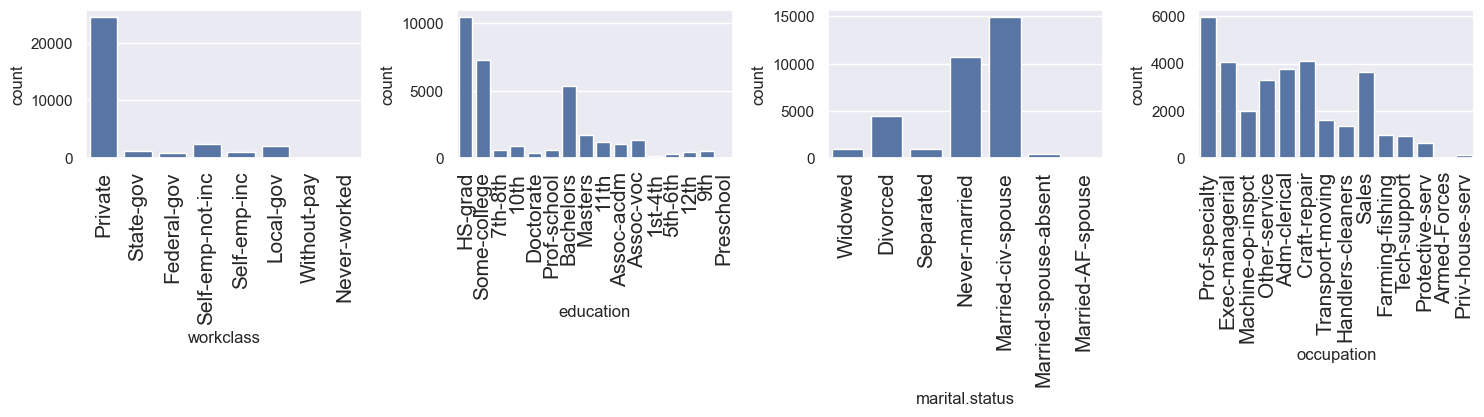

In [21]:
plt.style.use("fivethirtyeight")
sns.set_theme(rc={"figure.figsize":(15,6)})

columns1 = ["workclass", "education", "marital.status", "occupation"]
for i in range(0, len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()


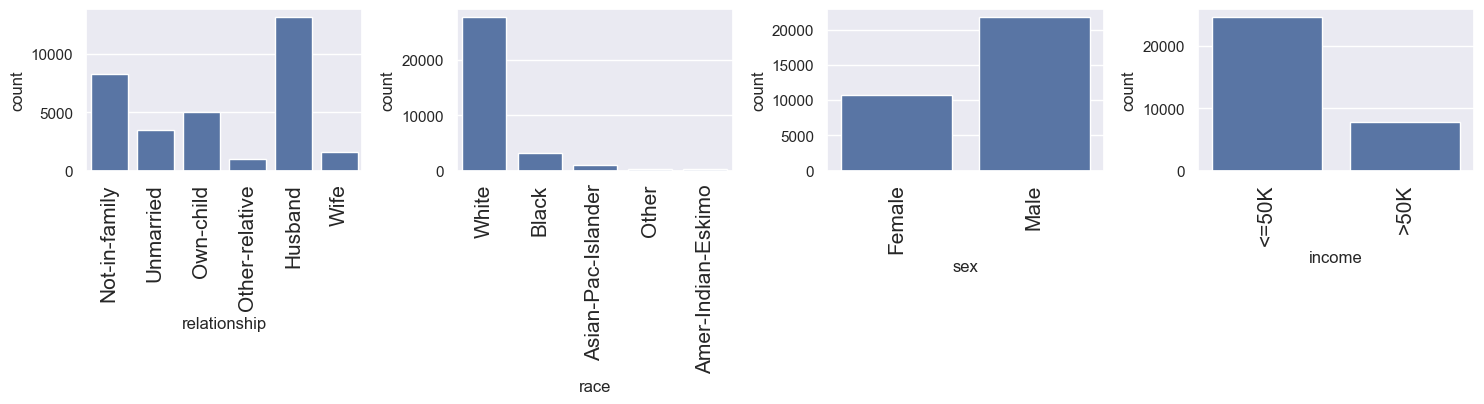

In [22]:
columns2 = ["relationship", "race", "sex", "income"]
for i in range(0, len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x = data[columns2[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

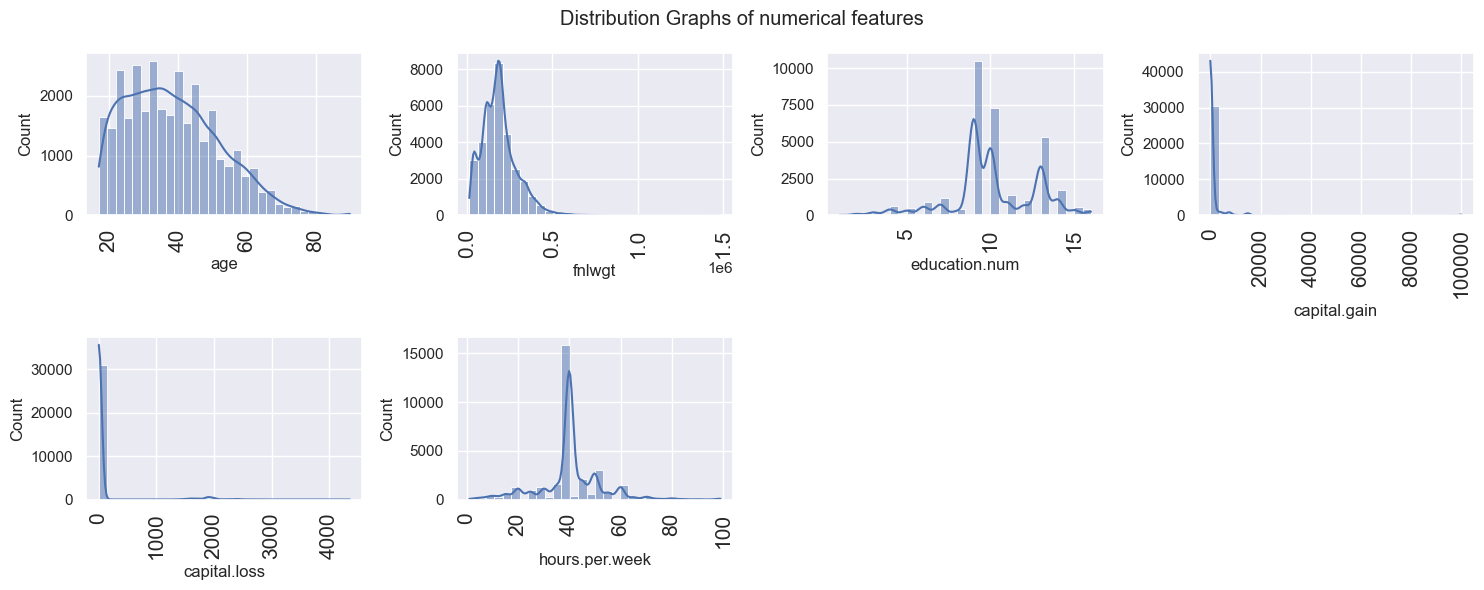

In [23]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0, len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.histplot(x=data[numerical_features[i]], kde=True, bins=30)
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

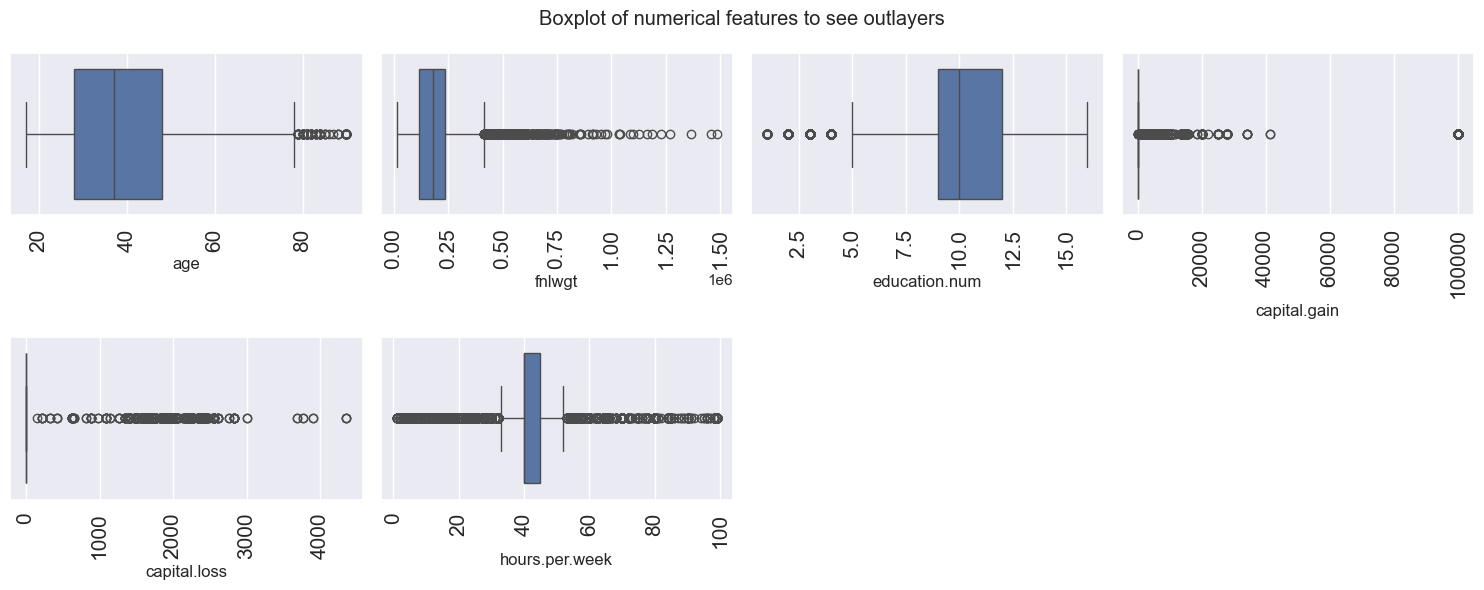

In [24]:
plt.suptitle("Boxplot of numerical features to see outlayers")
for i in range(0, len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

In [25]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income'>

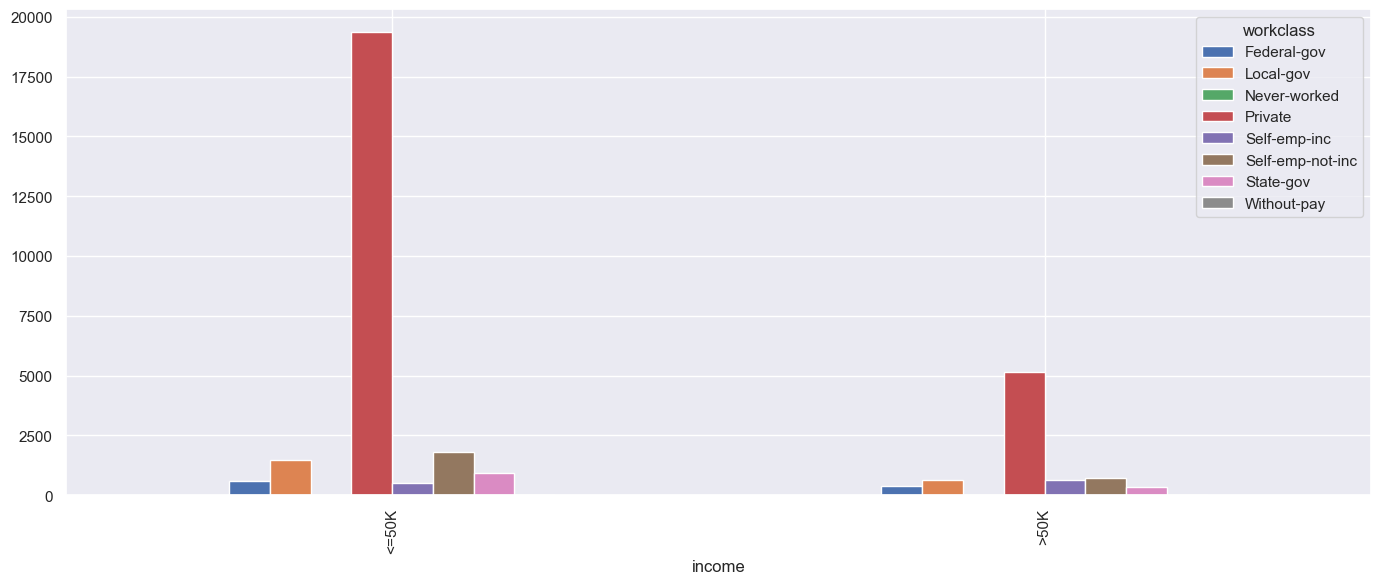

In [26]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

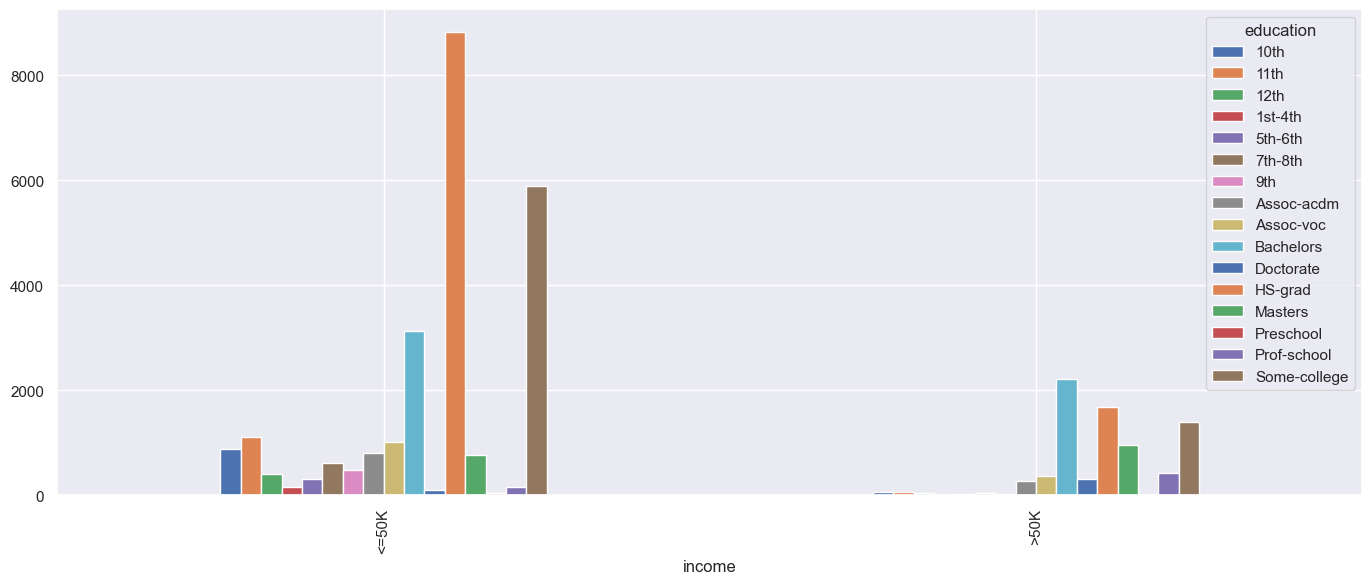

In [27]:
education = pd.crosstab(data['income'], data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

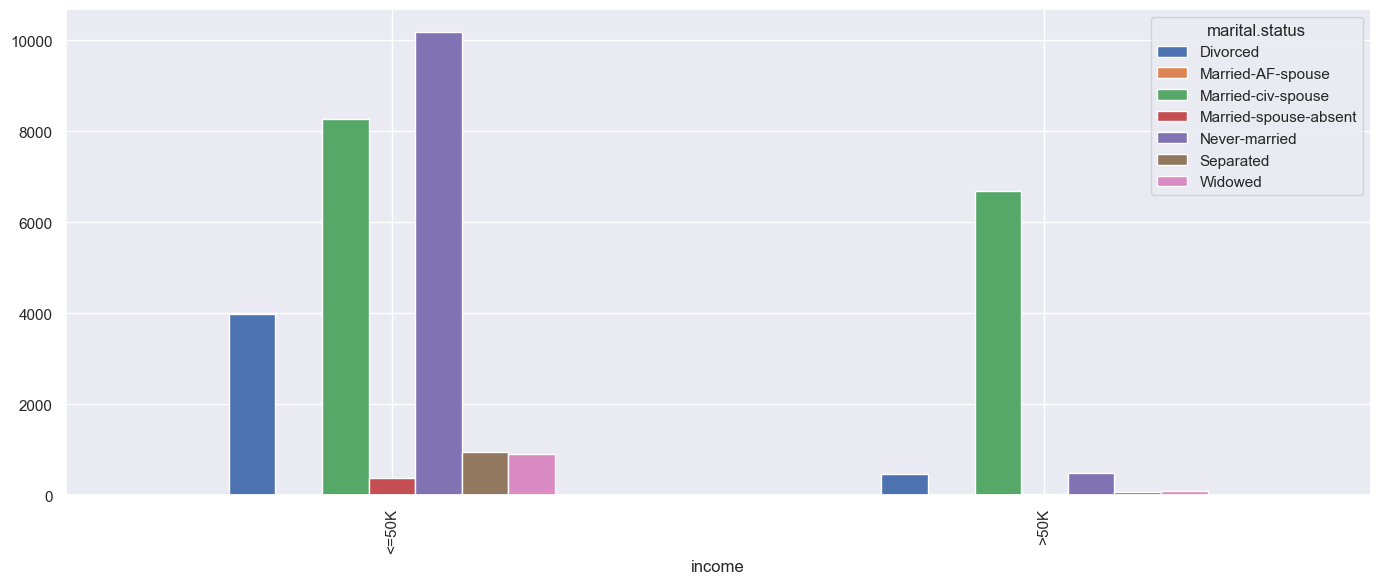

In [28]:
marital_status = pd.crosstab(data['income'], data['marital.status'])
marital_status.plot(kind='bar')

<Axes: xlabel='income'>

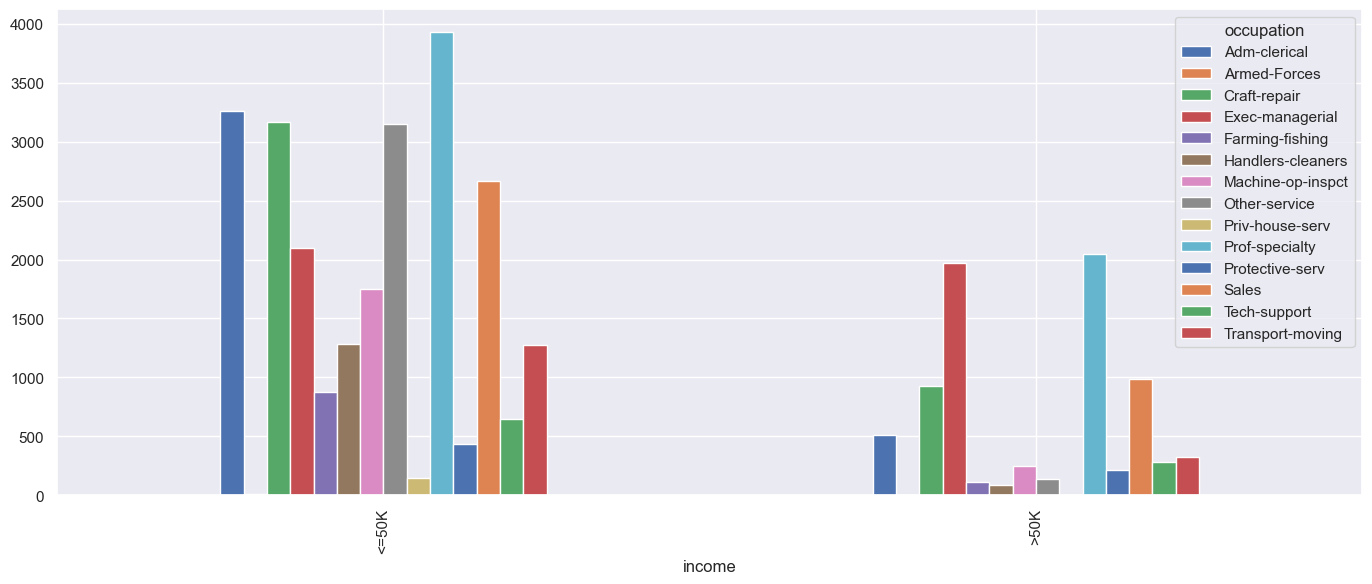

In [29]:
occupation = pd.crosstab(data['income'], data['occupation'])
occupation.plot(kind='bar')

<Axes: xlabel='income'>

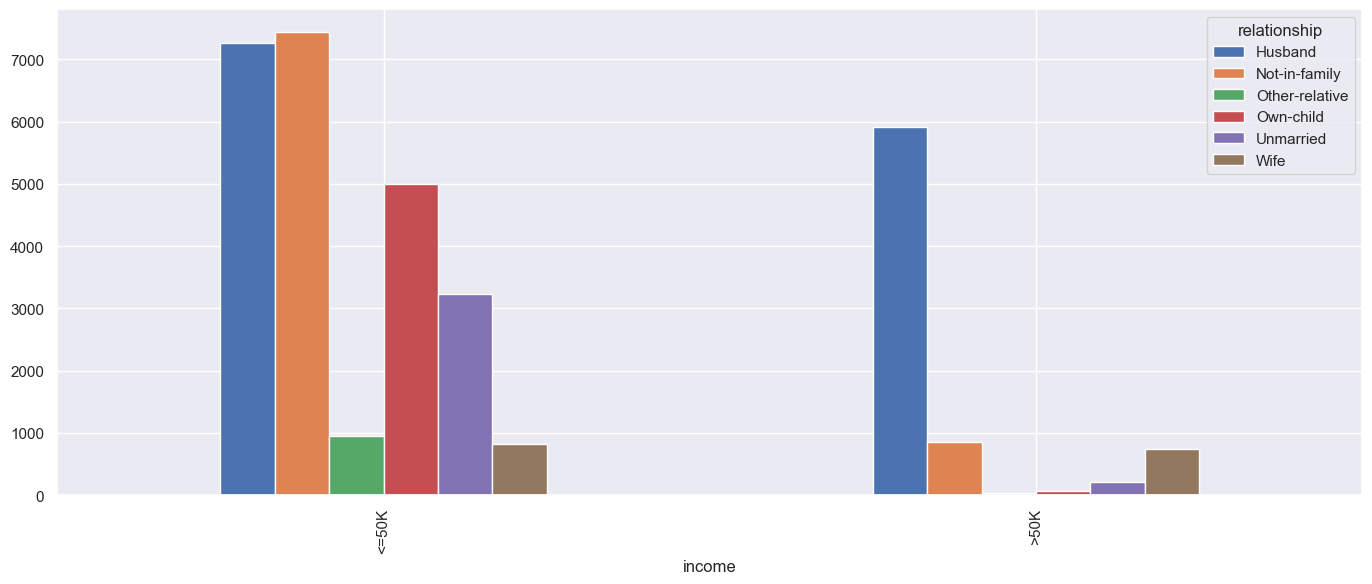

In [30]:
relationship = pd.crosstab(data['income'], data['relationship'])
relationship.plot(kind='bar')

<Axes: xlabel='income'>

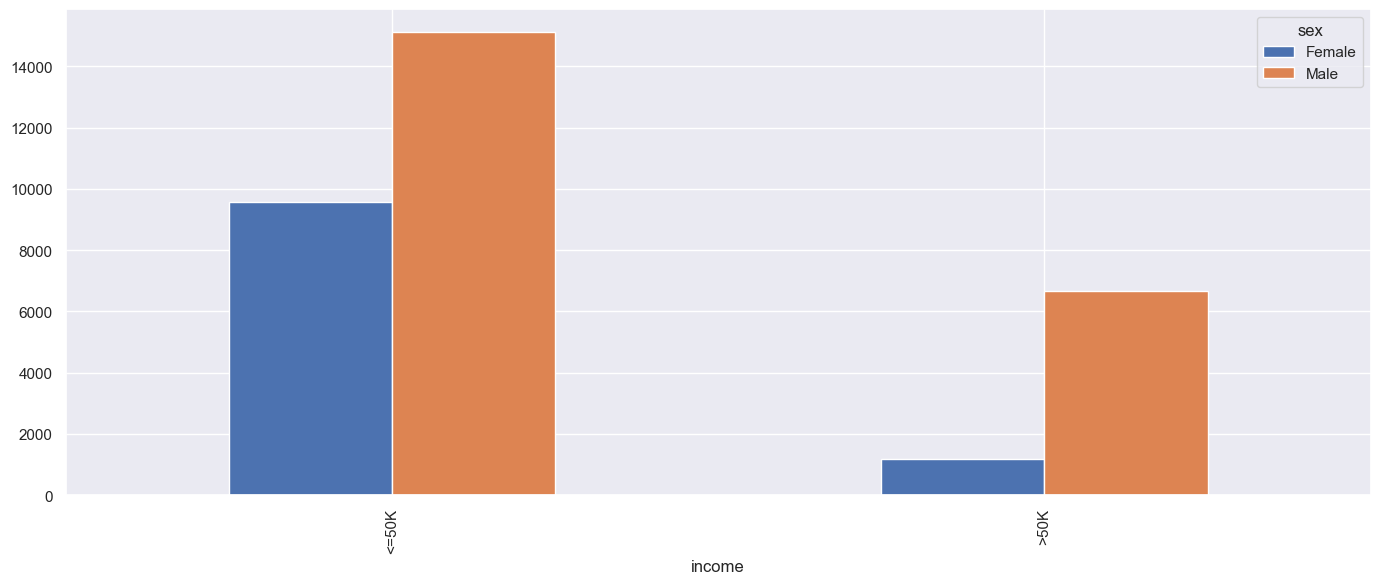

In [31]:
sex = pd.crosstab(data['income'], data['sex'])
sex.plot(kind='bar')

In [32]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
                        'relationship', 'race','sex', 'native.country']
le = LabelEncoder()
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])


In [33]:
data["income"] = data["income"].map({'<=50K':0,'>50K':1})

<Axes: >

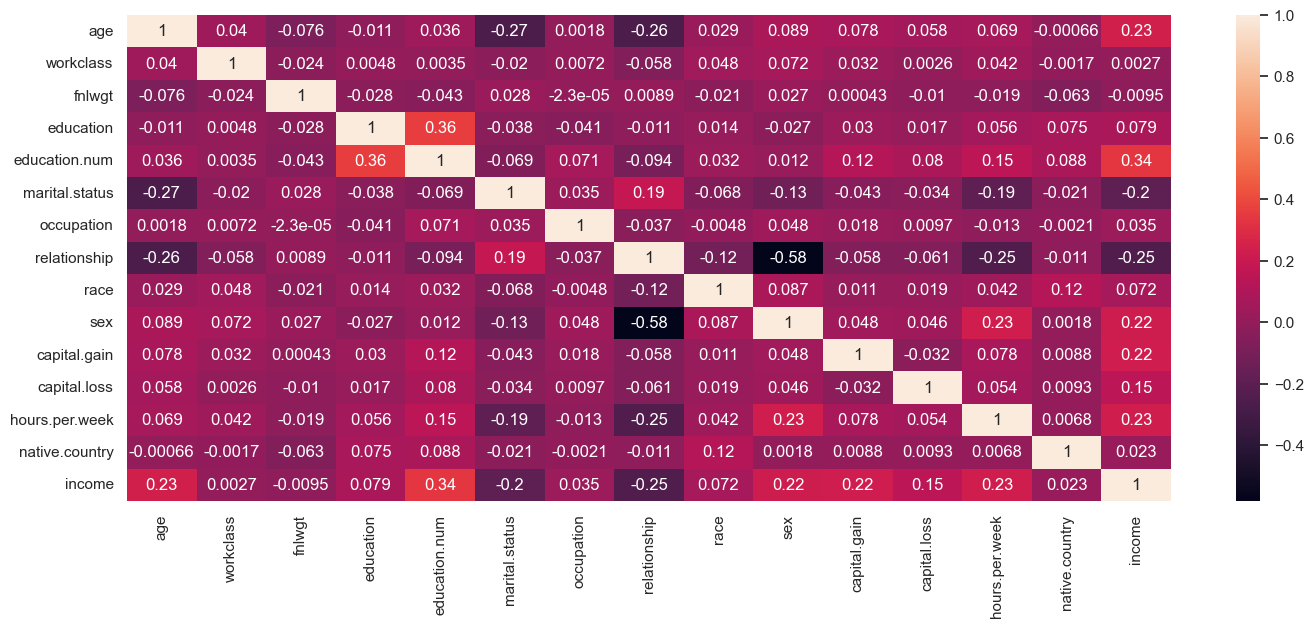

In [34]:
sns.heatmap(data.corr(), annot=True)

In [35]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [36]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [37]:
data.drop(["education","fnlwgt"], axis=1, inplace=True)

In [38]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


In [39]:
data.rename(columns={
    'martial.status': 'marital_status',
    'capital.gain': 'capital_gain',
    'capital.loss':'capital_loss',
    'hours.per.week':'hours_per_week',
    'native.country':'native_country'
    
}, inplace=True)


In [40]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


In [41]:
data.to_csv('data/cleandata.csv', index=False)

In [42]:
data.shape

(32537, 13)

In [43]:
# separate dependent and independent features
x = data.drop("income", axis=1)
y= data["income"]

In [44]:
data.dtypes

age               int64
workclass         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

In [45]:
# verification purpose only
categorical_features = x.select_dtypes(include='object').columns
numerical_features = x.select_dtypes(exclude='object').columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country'],
      dtype='object')


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_features)
])


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score, classification_report

In [51]:
def performance_metrics(test, predict):
    confusionmatrix = print(f"CONFUSION_MATRIX: {confusion_matrix(test, predict)}")
    precision = print(f"PRECISION_SCORE: {precision_score(test, predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test, predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test, predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test, predict)}")
    return confusionmatrix, precision, recall, f1score, accuracyscore

In [52]:
lr = LogisticRegression()

In [53]:
param = {
    "class_weight":["balanced"],
    "penalty":["l1","l2"],
    "C": [0.001,0.01,0.1,1,10,100],
    "solver":["liblinear","saga"]
}

In [54]:
grid = GridSearchCV(estimator=lr, param_grid=param, cv=5, n_jobs=1, verbose=3)

In [55]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.735 total time=   0.2s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.743 total time=   0.2s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.743 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.742 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.784 total time=   0.8s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.776 total time=   0.8s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   1.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.774 total time=   

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [56]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [57]:
grid.score(X_train, y_train)

0.7794767374851128

In [58]:
y_pred = grid.predict(X_test)

In [59]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(6508,))

In [60]:
accuracy_score(y_test, y_pred)

0.7811923786109404

In [64]:
dr = DecisionTreeClassifier()

In [69]:
param_grid = {
    "class_weight": ["balanced"],
    "criterion": ["gini","entropy","log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [3,4,5,6],
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": [1,2,3],
    "max_features": ["auto","sqrt","log2"]
}

In [70]:
grid_search = GridSearchCV(estimator=dr, param_grid=param_grid, cv=5,scoring="accuracy")

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [72]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [73]:
grid_search.score(X_train, y_train)

0.7850858657651082

In [74]:
y_pred = grid_search.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.7805777504609711

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4988
           1       0.53      0.50      0.52      1520

    accuracy                           0.78      6508
   macro avg       0.69      0.68      0.69      6508
weighted avg       0.78      0.78      0.78      6508



In [78]:
rf = RandomForestClassifier()

In [82]:
param_grid = {
    "class_weight":["balanced"],
    "n_estimators":[20,50,30],
    "max_depth":[10,8,5],
    "min_samples_split":[2,5,10]
}

In [83]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,scoring="accuracy")

In [84]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [85]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [86]:
grid_search.score(X_train, y_train)

0.8242729263513773

In [87]:
y_pred = grid_search.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.8057775046097111

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4988
           1       0.55      0.87      0.68      1520

    accuracy                           0.81      6508
   macro avg       0.75      0.83      0.77      6508
weighted avg       0.86      0.81      0.82      6508

